<a href="https://colab.research.google.com/github/DanialQureshi26/ML-Projects/blob/main/Celsius_to_Farenhitet_Simple_Regression_using_TensorFlow_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
# 1. Import Required Libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [35]:
# 2. Load the dataset
data = pd.read_csv('drive/MyDrive/training.csv')
data.head()

,Celsius,Fahrenheit
0,1169,2136.2
1,1280,2336.0
2,2380,4316.0
3,1508,2746.4
4,2015,3659.0


In [36]:
# 3. Splitting the data into X and Y
X = data['Celsius']
y = data['Fahrenheit']

In [37]:
# Verify data integrity
print("Data Description:")
data.describe()

Data Description:


,Celsius,Fahrenheit
count,16000.000000,16000.000000
mean,1254.736062,2290.524912
std,726.338268,1307.408882
min,0.000000,32.000000
25%,627.750000,1161.950000
50%,1265.000000,2309.000000
75%,1891.000000,3435.800000
max,2500.000000,4532.000000


In [42]:
# Checking the data type
X.dtype, y.dtype

(dtype('int64'), dtype('float64'))

In [43]:
# Checking for missing values
X.isna().sum(), y.isna().sum()

(0, 0)

In [44]:
# Normalize the data
X_mean, X_std = X.mean(), X.std()
y_mean, y_std = y.mean(), y.std()

X = (X - X_mean) / X_std
y = (y - y_mean) / y_std

In [45]:
X.head(), y.head()

(0   -0.118039
 1    0.034783
 2    1.549228
 3    0.348686
 4    1.046708
 Name: Celsius, dtype: float64,
 0   -0.118039
 1    0.034783
 2    1.549228
 3    0.348686
 4    1.046708
 Name: Fahrenheit, dtype: float64)

In [46]:
# 4. Splitting the data into the training and test splits
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
# Convert to TensorFlow tensors
X_train = tf.constant(X_train, dtype=tf.float32)
X_test = tf.constant(X_test, dtype=tf.float32)
y_train = tf.constant(y_train, dtype=tf.float32)
y_test = tf.constant(y_test, dtype=tf.float32)

In [48]:
# 5. Create the Model
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=[1]),
    tf.keras.layers.Dense(1)
])

In [50]:
# 6. Compile the Model with a lower learning rate
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.001), loss='mse', metrics=['mae'])

In [51]:
# 7. Train the Model
history = model.fit(X_train, y_train, epochs=100, verbose=0, validation_data=(X_test, y_test))

In [52]:
# 8. Evaluate the Model
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=0)
print(f"Test MAE: {test_mae:.2f}")

Test MAE: 0.00


In [53]:
# Inspect model predictions
y_pred = model.predict(X_test)
print("\nSample Predictions:")
for i in range(5):
    print(f"True: {y_test.numpy()[i]}, Predicted: {y_pred[i][0]}")


100/100 [==============================] - 0s 1ms/step

Sample Predictions:
True: 0.24680502712726593, Predicted: 0.24680277705192566
True: 0.5125214457511902, Predicted: 0.5125167369842529
True: 1.174747347831726, Predicted: 1.1747363805770874
True: -0.6288200616836548, Predicted: -0.628814160823822
True: 1.0577219724655151, Predicted: 1.0577120780944824


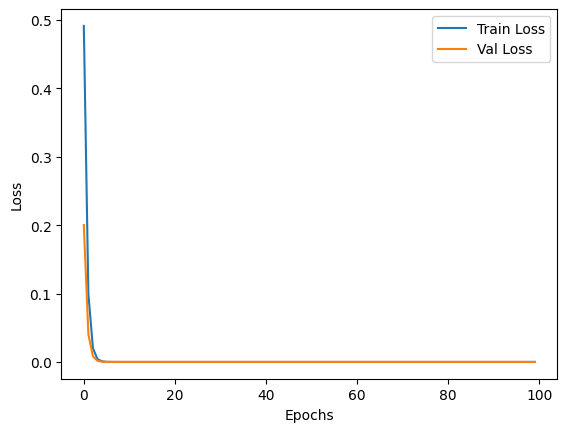

In [54]:
# 9. Plot the training and validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

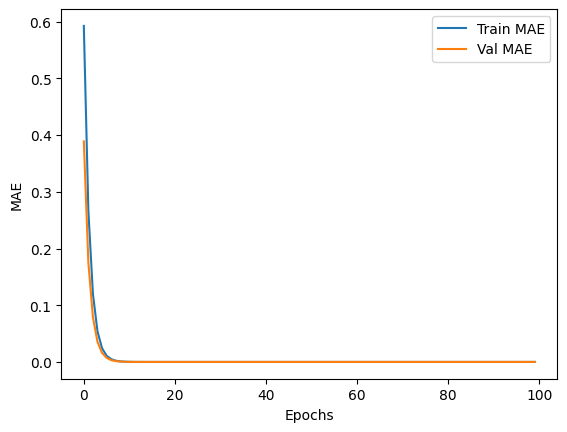

In [55]:
# 10. Plot the training and validation MAE
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Val MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

In [56]:
# Denormalize predictions and actual values
y_test_denorm = y_test * y_std + y_mean
y_pred_denorm = y_pred * y_std + y_mean

In [57]:
print("\nSample Predictions (Denormalized):")
for i in range(5):
    print(f"True: {y_test_denorm.numpy()[i]}, Predicted: {y_pred_denorm[i][0]}")


Sample Predictions (Denormalized):
True: 2613.199951171875, Predicted: 2613.197021484375
True: 2960.60009765625, Predicted: 2960.59375
True: 3826.39990234375, Predicted: 3826.3857421875
True: 1468.39990234375, Predicted: 1468.40771484375
True: 3673.39990234375, Predicted: 3673.38720703125
